# Plot data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = "../../../data/03_qdec_tables/ALL.sorted.qdec.table.dat"

In [3]:
df = pd.read_csv(data,sep=" ")

In [4]:
df.head()

,fsid,fsid_base,int,bl_age,edu,sex,scanner
0,sub-CO11128ses01mpibtrio,sub-CO11128_base_mpibtrio,0.00,32.71,16.0,0,mpibtrio
1,sub-CO11128ses02mpibtrio,sub-CO11128_base_mpibtrio,2.68,32.71,16.0,0,mpibtrio
2,sub-CO12210ses01mpibtrio,sub-CO12210_base_mpibtrio,0.00,33.87,13.0,1,mpibtrio
3,sub-CO12210ses02mpibtrio,sub-CO12210_base_mpibtrio,2.73,33.87,13.0,1,mpibtrio
4,sub-CO12264ses01mpibtrio,sub-CO12264_base_mpibtrio,0.00,30.28,13.0,1,mpibtrio


In [5]:
len(df)

1858

In [8]:
len(df[df['int']==0])

741

In [9]:
df['id'] = df['fsid_base'].apply(lambda x: x.split("_")[0])

In [10]:
len(df['id'].unique())

742

In [13]:
df['age'] = df['int'] + df['bl_age']

In [14]:
min(df['age'])

29.15

In [15]:
max(df['age'])

89.72

In [17]:
len(df[(df['sex']==1) & (df['int']==0)])

370

In [22]:
len(df[(df['sex_coded']==0) & (df['years']==0)])

366

In [18]:
df['sex'][df['id']=='sub-B0025.50'] # This participant has only 2nd timepoint.

1638    0
Name: sex, dtype: int64

In [19]:
df['diff_last_first_timepoint'] = df['id'].apply(lambda x: df['int'][df['id']==x].iloc[-1]-df['int'][df['id']==x].iloc[0])

In [21]:
df[(df['int']==0)]['diff_last_first_timepoint'].mean()

4.0449257759784105

In [23]:
min(df[(df['int']==0) & (df['diff_last_first_timepoint']>1)]['diff_last_first_timepoint'])

1.05

In [24]:
max(df[(df['int']==0) & (df['diff_last_first_timepoint']>1)]['diff_last_first_timepoint'])

11.23

(array([324., 329., 318., 271.,   0.,  34.,  90., 280., 125.,  55.]),
 array([ 1.05 ,  2.068,  3.086,  4.104,  5.122,  6.14 ,  7.158,  8.176,
         9.194, 10.212, 11.23 ]),
 <a list of 10 Patch objects>)

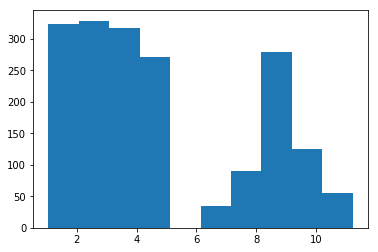

In [25]:
plt.hist(df['diff_last_first_timepoint'][df['diff_last_first_timepoint']>1])

In [26]:
df[df['diff_last_first_timepoint']<1]

,fsid,fsid_base,int,bl_age,edu,sex,scanner,id,age,diff_last_first_timepoint
1638,sub-B0025.50ses02umuDISCOVERYMR750,sub-B0025.50_base_umuDISCOVERYMR750,5.0,71.0,16.0,0,umuDISCOVERYMR750,sub-B0025.50,76.0,0.0
1789,sub-B2505.30ses01umuDISCOVERYMR750,sub-B2505.30_base_umuDISCOVERYMR750,0.0,30.0,14.0,0,umuDISCOVERYMR750,sub-B2505.30,30.0,0.0


In [27]:
df[df['id']=='sub-B2505.30']

,fsid,fsid_base,int,bl_age,edu,sex,scanner,id,age,diff_last_first_timepoint
1789,sub-B2505.30ses01umuDISCOVERYMR750,sub-B2505.30_base_umuDISCOVERYMR750,0.0,30.0,14.0,0,umuDISCOVERYMR750,sub-B2505.30,30.0,0.0


In [29]:
max(df[df['int']==0]['diff_last_first_timepoint'])

11.23

In [30]:
aseg_data = "../../../data/05_aseg_tables/ALL.aseg.long.table"

In [31]:
df_aseg = pd.read_csv(aseg_data,sep="\t")
df_aseg.head()

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,EstimatedTotalIntraCranialVol
0,sub-CO11128ses01mpibtrio.long.sub-CO11128_base...,18606.0,713.9,20286.4,69147.6,8224.4,4860.0,5503.1,2313.2,1346.8,...,283121.5,569291.0,71877.0,757456.925523,1229520.0,1185431.0,1891895.0,0.804464,1.081050,1.750053e+06
1,sub-CO11128ses02mpibtrio.long.sub-CO11128_base...,19724.8,822.1,19493.0,69544.1,8172.9,4760.0,5515.4,2365.3,1323.0,...,282860.0,566976.0,71308.0,742614.624707,1213118.0,1166601.0,1891999.0,0.794868,1.081109,1.750053e+06
2,sub-CO12210ses01mpibtrio.long.sub-CO12210_base...,4397.1,357.1,12691.7,49154.9,6823.0,3439.4,4885.6,1868.5,855.6,...,197220.0,398207.0,58341.0,625112.129373,936981.0,923032.0,1413097.0,1.065476,1.421804,9.938759e+05
3,sub-CO12210ses02mpibtrio.long.sub-CO12210_base...,5341.5,416.8,11922.3,47895.8,6565.7,3293.5,4782.4,1832.5,983.8,...,194308.0,390834.0,56262.0,603616.291804,912123.0,895930.0,1415335.0,1.037297,1.424056,9.938759e+05
4,sub-CO12264ses01mpibtrio.long.sub-CO12264_base...,3134.3,224.1,16199.0,50818.7,8057.3,3209.1,5296.9,1954.1,798.4,...,216630.5,437208.0,62105.0,632284.863164,975996.0,964597.0,1412289.0,1.084045,1.379673,1.023641e+06


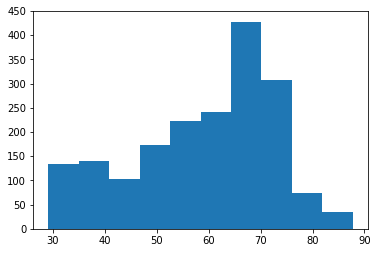

In [33]:
plt.hist(df['bl_age'])
plt.show()

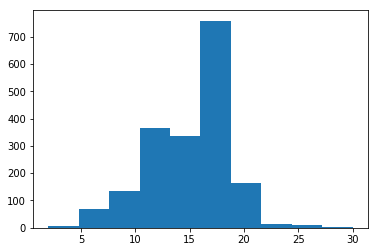

In [34]:
plt.hist(df['edu'])
plt.show()

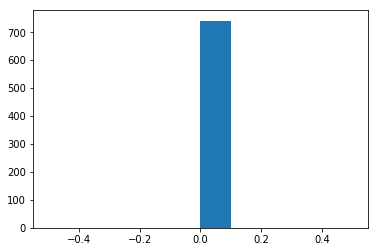

In [36]:
plt.hist(df[df['int']==0]['int'])
plt.show()

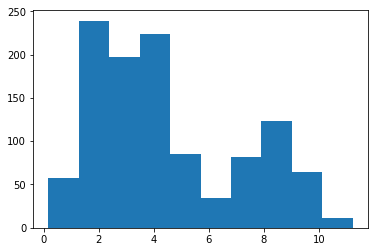

In [38]:
plt.hist(df[df['int']>0]['int'])
plt.show()

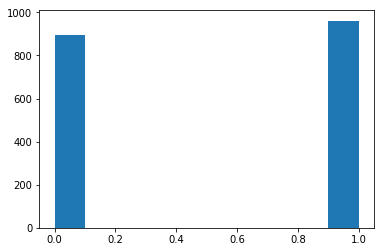

In [39]:
plt.hist(df['sex'])
plt.show()

In [40]:
pd.unique(df['scanner'])

array(['mpibtrio', 'ubTriotrim', 'ucamTrioTrim', 'ousAvanto', 'ousSkyra',
       'umuDISCOVERYMR750'], dtype=object)

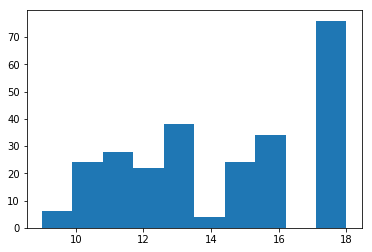

In [41]:
plt.hist(df[df['scanner']=="mpibtrio"]['edu'])
plt.show()

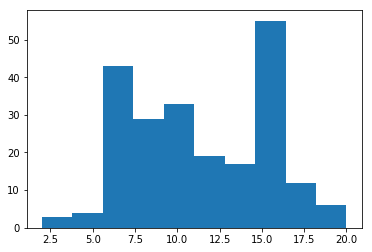

In [42]:
plt.hist(df[df['scanner']=="ubTriotrim"]['edu'])
plt.show()

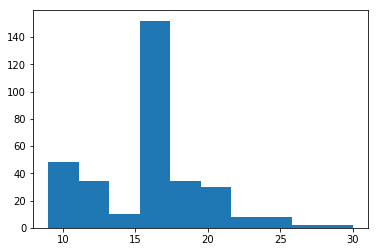

In [43]:
plt.hist(df[df['scanner']=="ucamTrioTrim"]['edu'])
plt.show()

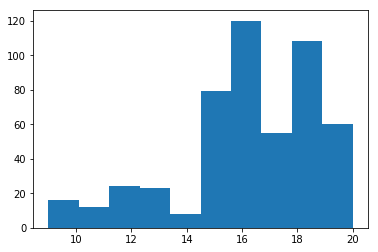

In [44]:
plt.hist(df[df['scanner']=="ousAvanto"]['edu'])
plt.show()

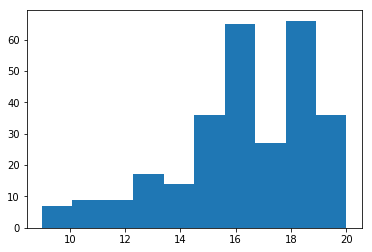

In [45]:
plt.hist(df[df['scanner']=="ousSkyra"]['edu'])
plt.show()

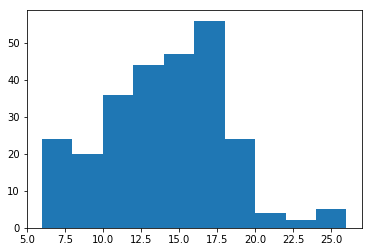

In [46]:
plt.hist(df[df['scanner']=="umuDISCOVERYMR750"]['edu'])
plt.show()